# **Day 7: Neural Network Architectures**

---

## **Introduction**

Neural networks are the backbone of many modern AI applications. In this notebook, we will:
1. Design a realistic neural network with multiple layers and non-linear activations.
2. Generate synthetic data for a classification task.
3. Train a feedforward neural network using Keras.
4. Evaluate the model on validation data and explain performance.
5. Discuss practical considerations like regularization and overfitting.

---

## **1. Neural Network Design**

### **Architecture**

The architecture we’ll build:
- Input Layer: 8 features (simulated input data).
- 2 Hidden Layers:
  - Hidden Layer 1: 16 neurons, `ReLU` activation.
  - Hidden Layer 2: 8 neurons, `ReLU` activation.
- Output Layer: 3 neurons (multi-class classification with softmax).

### **Parameter Calculation**

For each layer:
- Weights = (neurons in the current layer) × (neurons in the previous layer)
- Biases = (neurons in the current layer)
- Total parameters = Weights + Biases




In [3]:
# Parameter Calculation
# Architecture: Input -> 8 features, Hidden Layer 1 -> 16 neurons,
# Hidden Layer 2 -> 8 neurons, Output Layer -> 3 neurons

# Parameters for Hidden Layer 1
weights_h1 = 8 * 16
biases_h1 = 16
params_h1 = weights_h1 + biases_h1

# Parameters for Hidden Layer 2
weights_h2 = 16 * 8
biases_h2 = 8
params_h2 = weights_h2 + biases_h2

# Parameters for Output Layer
weights_out = 8 * 3
biases_out = 3
params_out = weights_out + biases_out

# Total parameters
total_params = params_h1 + params_h2 + params_out
print(f"Total Parameters: {total_params}")

Total Parameters: 307


### **Explanation**

1. **Hidden Layer 1:**
   - Weights = 8 (input features) × 16 (neurons) = 128
   - Biases = 16
   - Total = 128 + 16 = 144

2. **Hidden Layer 2:**
   - Weights = 16 × 8 = 128
   - Biases = 8
   - Total = 128 + 8 = 136

3. **Output Layer:**
   - Weights = 8 × 3 = 24
   - Biases = 3
   - Total = 24 + 3 = 27

4. **Total Parameters:** 144 + 136 + 27 = **307 parameters**


# **2. Generate Synthetic Data**

We will generate a multi-class dataset with 3 classes and 8 features using the make_classification function from sklearn.

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np

# Generate synthetic dataset
X, y = make_classification(
    n_samples=1000,     # Number of data points
    n_features=8,       # Number of features
    n_informative=6,    # Informative features
    n_classes=3,        # Number of output classes
    random_state=42
)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding for multi-class classification
y_train = np.eye(3)[y_train]
y_val = np.eye(3)[y_val]

print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, Validation labels shape: {y_val.shape}")


Training data shape: (800, 8), Training labels shape: (800, 3)
Validation data shape: (200, 8), Validation labels shape: (200, 3)


### **Explanation**

1. **Data Generation:**
   - `make_classification` creates a dataset with 8 features, out of which 6 are informative for classification.
   - 3 classes represent the output categories.

2. **Train-Validation Split:**
   - Training set: 80% of the data.
   - Validation set: 20% of the data.

3. **One-Hot Encoding:**
   - Each class label is converted into a one-hot encoded vector for multi-class classification.
   - Example: Class `1` → `[0, 1, 0]`.


# **3. Build and Train the Neural Network**
**Model Architecture**
- 2 hidden layers with ReLU activation.
- Output layer with softmax activation.
- Added L2 regularization to avoid overfitting.

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2

# Create the model
model = Sequential()

# Hidden Layer 1
model.add(Dense(16, input_dim=8, activation='relu', kernel_regularizer=l2(0.01)))

# Hidden Layer 2
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))

# Output Layer
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50, batch_size=32, verbose=1
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.3367 - loss: 1.5405 - val_accuracy: 0.4900 - val_loss: 1.3625
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4072 - loss: 1.3724 - val_accuracy: 0.5000 - val_loss: 1.2691
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4629 - loss: 1.3011 - val_accuracy: 0.5400 - val_loss: 1.2082
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5134 - loss: 1.2296 - val_accuracy: 0.5650 - val_loss: 1.1675
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5459 - loss: 1.1748 - val_accuracy: 0.6050 - val_loss: 1.1365
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5641 - loss: 1.1466 - val_accuracy: 0.6450 - val_loss: 1.1070
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5670 - loss: 1.1142 - val_accuracy: 0.6300 - val_loss: 1.0827
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6137 - loss: 1.0743 - val_accuracy: 0.6200 - val_loss: 1.0557
Ep

### **Explanation**

#### **1. Model Definition**

##### **Hidden Layer 1**
- **`Dense(16, input_dim=8, activation='relu')`**
  - **Input Dimension**: The layer expects 8 input features (as defined by `input_dim=8`). Each feature corresponds to one column in our dataset.
  - **Neurons**: The layer has 16 neurons. Each neuron learns a weight for every input feature and applies the ReLU activation function to the weighted sum of inputs.
  - **Activation Function (`ReLU`)**:
    - ReLU (Rectified Linear Unit) is defined as:  
      `f(x) = max(0, x)`
    - It introduces non-linearity into the model, allowing it to learn complex patterns in the data.

##### **Hidden Layer 2**
- **`Dense(8, activation='relu')`**
  - **Input to the Layer**: This layer takes the output from the first hidden layer (16 neurons) as its input.
  - **Neurons**: The layer has 8 neurons. Each neuron will learn its own set of weights and biases from the previous layer's outputs.
  - **Activation Function (`ReLU`)**: As with the first layer, ReLU ensures non-linearity.

##### **Output Layer**
- **`Dense(3, activation='softmax')`**
  - **Neurons**: The output layer has 3 neurons, each corresponding to one class in the classification problem.
  - **Activation Function (`softmax`)**:
    - Softmax converts raw output values (logits) into probabilities. The formula for the i-th class is:
      `P(y_i) = exp(z_i) / sum(exp(z_j)) for all classes j`
      where `z_i` is the raw output for class `i` and `sum(exp(z_j))` is the sum of exponentials of the logits for all classes.
    - The probabilities sum to 1, making it suitable for multi-class classification.

---

#### **2. Regularization**

##### **`l2(0.01)`**
- **Purpose**:
  - Regularization prevents the model from overfitting the training data by penalizing large weights in the network.
- **How It Works**:
  - Adds an L2 penalty term to the loss function:
    `L = L_original + lambda * sum(w^2)`
    - `L_original`: Original loss (e.g., cross-entropy loss).
    - `lambda`: Regularization strength (here, 0.01).
    - `w^2`: Sum of the squared weights for each layer.
  - This discourages the model from assigning excessive importance to any single feature.

---

#### **3. Model Compilation**

##### **Optimizer: `adam`**
- Adam (Adaptive Moment Estimation) adjusts the learning rate dynamically during training:
  - Combines the advantages of RMSprop and Momentum optimizers.
  - Maintains separate learning rates for each weight, which are adjusted based on the first and second moments of the gradients.

##### **Loss Function: `categorical_crossentropy`**
- Used for multi-class classification tasks.
- Measures the distance between the true class labels (one-hot encoded) and predicted probabilities.
- The formula is:
  `Loss = -1/N * sum(y_ij * log(y_hat_ij)) for all samples i and classes j`
  - `N`: Number of samples.
  - `C`: Number of classes.
  - `y_ij`: True label for sample `i` and class `j` (1 if it belongs to the class, otherwise 0).
  - `y_hat_ij`: Predicted probability for sample `i` and class `j`.

##### **Metric: `accuracy`**
- The percentage of correctly classified samples out of the total.

---

#### **4. Model Training**

##### **Epochs: `50`**
- An epoch is one complete pass through the entire training dataset.
- Training for 50 epochs means the model will see the entire dataset 50 times.
- **Considerations**:
  - Too few epochs might result in underfitting (model doesn’t learn enough).
  - Too many epochs can lead to overfitting (model memorizes training data).

##### **Batch Size: `32`**
- Batch size refers to the number of samples processed at a time before updating the model weights.
- **Advantages of Mini-Batch Gradient Descent**:
  - Faster convergence compared to full-batch gradient descent.
  - Reduces memory usage by processing small batches instead of the entire dataset.

##### **Validation Data**
- Validation data is unseen by the model during training and helps in monitoring generalization performance.
- Metrics (loss, accuracy) on the validation set indicate whether the model is overfitting or underfitting.

##### **Key Training Steps**:
1. **Forward Pass**:
   - Input data is passed through each layer, and activations are computed until the output layer.
2. **Loss Computation**:
   - The difference between the predicted output and true labels is calculated using the loss function.
3. **Backward Pass (Backpropagation)**:
   - Gradients of the loss with respect to weights and biases are computed layer by layer (chain rule).
4. **Weight Updates**:
   - The optimizer updates the weights using the gradients and the learning rate.


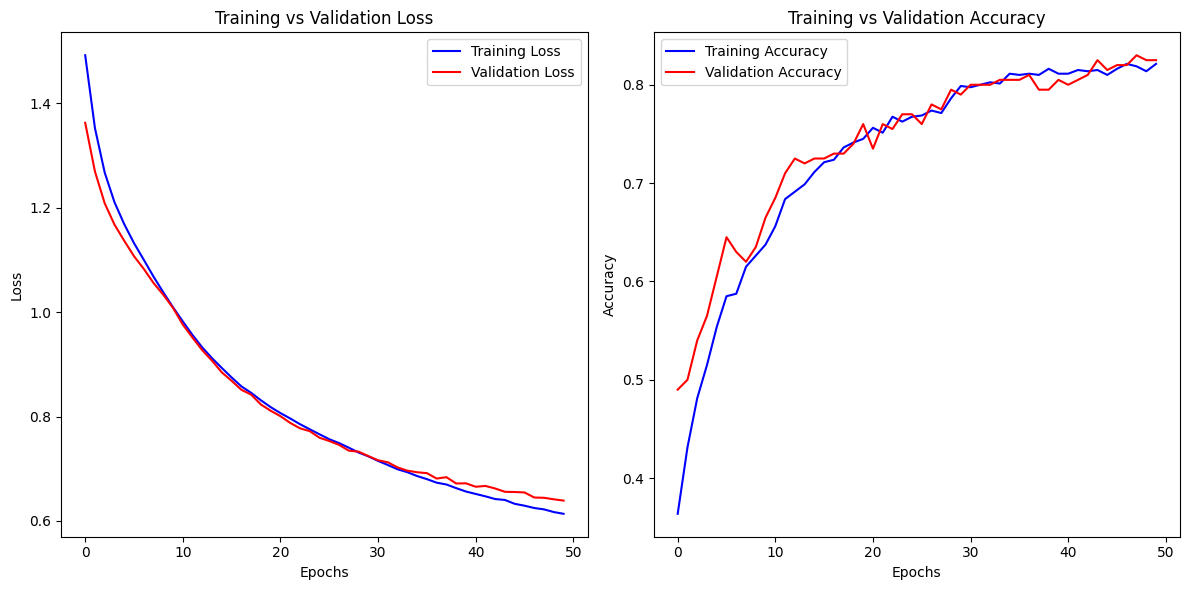

In [7]:
import matplotlib.pyplot as plt

# Assuming history.history contains the loss and accuracy data
plt.figure(figsize=(12, 6))

# Plot the training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


### Plotting the Training and Validation Loss Curve

In this section, we will plot the training and validation loss over the epochs, as well as the training and validation accuracy.

1. **Training Loss (blue)**: This curve shows how the model's loss decreases over time while it is learning on the training data.
2. **Validation Loss (red)**: This curve tracks the model's performance on unseen data during training. Ideally, we want the validation loss to decrease along with the training loss, indicating that the model is generalizing well.
3. **Training Accuracy (blue)**: This shows how accurate the model is on the training data over the epochs. Accuracy typically increases as the model learns.
4. **Validation Accuracy (red)**: This shows how well the model performs on the validation dataset. We want the validation accuracy to increase as the model generalizes better.

In this plot, we use two subplots:
- The first subplot shows the loss curves for both training and validation data.
- The second subplot shows the accuracy curves for both training and validation data.

The `tight_layout()` function is used to prevent overlapping of the subplots, and `show()` renders the plot.


# **4. Evaluate the Model**

In [6]:
# Evaluate on validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


Validation Loss: 0.6390
Validation Accuracy: 0.8250


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


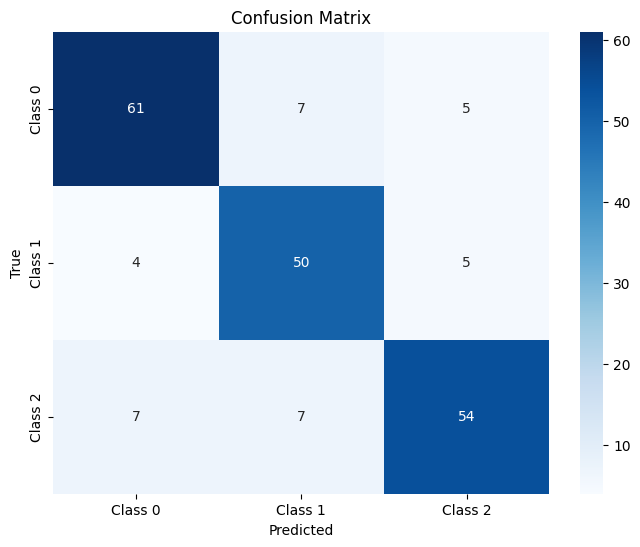

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Assuming y_test is the true labels and y_pred is the predicted labels from the model
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true = np.argmax(y_val, axis=1)  # True class labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Plotting a Confusion Matrix

After training the neural network model, it's crucial to assess its performance on the test dataset. One effective way to evaluate a classification model is by using a **confusion matrix**.

1. **Confusion Matrix**: This matrix shows the number of correct and incorrect predictions, broken down by each class. The matrix is a 2D table where:
   - **Rows** represent the true labels (actual classes).
   - **Columns** represent the predicted labels (model's output).
   - The diagonal elements represent the number of correct predictions for each class.
   - Off-diagonal elements indicate misclassifications.

In the code:
- `np.argmax()` is used to get the predicted and true class labels for the confusion matrix.
- `confusion_matrix()` computes the confusion matrix from the true and predicted labels.
- We use `seaborn` to create a heatmap of the confusion matrix for better visualization, with annotations for the actual counts.

The heatmap will display:
- Blue shades for each cell, with darker shades indicating higher counts.
- The class names ('Class 0', 'Class 1', 'Class 2') are labeled on both axes for easy interpretation.

This visualization helps identify areas where the model is making mistakes, such as misclassifying one class as another.


### **Explanation**

1. **Model Evaluation:**
   - The trained model is tested on validation data to calculate the loss and accuracy.
   - `val_loss` indicates how well the model generalizes to unseen data.
   - `val_accuracy` represents the percentage of correct predictions.


# **5. Advantages and Disadvantages**

### **Advantages**
1. Flexible architecture capable of learning complex patterns.
2. Handles multi-class classification tasks efficiently.
3. Regularization techniques like L2 prevent overfitting.

### **Disadvantages**
1. Prone to overfitting without regularization or sufficient data.
2. Computationally expensive for large datasets and deeper architectures.
3. Requires careful hyperparameter tuning (e.g., learning rate, batch size, etc.).


# **Conclusion**

In this notebook, we:
1. Designed a realistic multi-layer neural network.
2. Generated synthetic data for a multi-class classification problem.
3. Trained and evaluated the network using Keras.
4. Discussed practical considerations like regularization and overfitting.

This lays the foundation for more complex architectures like CNNs and RNNs.
